# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import statsmodels.api as smf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [4]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
insurance=pd.read_csv("/content/gdrive/MyDrive/Econ441B/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.loc[insurance['sex']=='female','sex']=1
insurance.loc[insurance['sex']=='male','sex']=0
insurance.loc[insurance['smoker']=='yes','smoker']=1
insurance.loc[insurance['smoker']=='no','smoker']=0

In [23]:
from sklearn import preprocessing
insurance['region']=preprocessing.LabelEncoder().fit_transform(insurance['region'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [8]:
cut=int((len(insurance)*0.8//1))

In [9]:
in_data=insurance.iloc[:cut,0:6]
out_data=insurance.iloc[cut:,0:6]
in_target=insurance.iloc[:cut,6]
out_target=insurance.iloc[cut:,6]

# 3.) Normalize the Data

In [10]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [11]:
from sklearn.linear_model import LassoCV
modCV=LassoCV().fit(in_data_scale,in_target)
a=modCV.alpha_
a

133.34880015958146

# 5.) Run a lambda regression with that Lambda

In [12]:
from sklearn.linear_model import Lasso
mod1=Lasso(alpha=a).fit(in_data_scale,in_target)

In [13]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

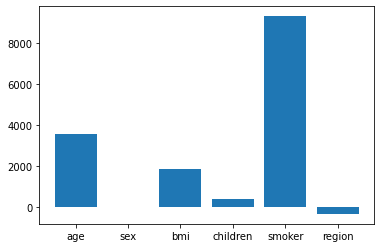

In [14]:
plt.bar(['age','sex','bmi','children','smoker','region'],mod1.coef_)
plt.show()

# 7.) Interpret the coefficients

From the plot in part6, we can see that, age, bmi, chilren, smoker is positively correlated with response variable charges. And region(southwest=3,southeast=2,northwest=1,northest=0) is negatively correlated with response variable charges. And sex can be removed from the model. 

# 8.) Compare in and out of sample MSE’s

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
predict_in_data=mod1.predict(in_data_scale)
print(mean_squared_error(in_target,predict_in_data))
predict_out_data=mod1.predict(out_data_scale)
print(mean_squared_error(out_target,predict_out_data))

36490415.101693384
37252730.724018715


As we can see above, the MSE for in-sample data is 36490415.10, which is a little bit lower than the out-sample data which is 37252730.72